# AI 534 Homework 2 {-}

Author: Tanner Wells

## Part 0: {-}

1. 
    <br>
    The words are lowercased because otherwise we have duplicate strings that effectively mean the same thing but have different values in the training. Punctionations being split is important because otherwise the same word would have different values with punctioation at the end, when the words mean the same thing. Verb contractions being split allow for a word to be broken down into its consituent words. "We'd" can be better understood as "We would" by splitting into separate words as conpared to making a new full word and assignming that word meaning. If single and double quotes were not changed to forward and backward then quotes would be identical and there would be no way of knowing if a quote was beginning or ending without making the code a lot more complicated. I imagine that training on Spanish reviews would also work, but that there is too small a sample size in the training data. Since there are not enough Spanish reviews to train on, they need to be removed. 

## Part 1: {-}



In [1]:

import pandas as pd
import numpy as np

import train
#Import my version of train.py
import train2
from svector import svector
train.train("train.csv","dev.csv",10)



epoch 1, update 38.8%, dev 36.6%
epoch 2, update 25.1%, dev 34.6%
epoch 3, update 20.7%, dev 33.8%
epoch 4, update 16.7%, dev 31.7%
epoch 5, update 13.8%, dev 34.0%
epoch 6, update 12.1%, dev 31.9%
epoch 7, update 10.3%, dev 30.1%
epoch 8, update 9.2%, dev 30.6%
epoch 9, update 8.4%, dev 31.8%
epoch 10, update 7.0%, dev 31.4%
best dev err 30.1%, |w|=16743, time: 3.7 secs


Take a look at svector.py, and briefly explain why it can support addition, subtraction, scalar product, dot product, and negation (0.5 pts).
1. 
    <br>
    Looking at svector.py, the functions iadd, add, isub, and sub support addition and subtraction by looping through the items in two vectors and adding/subtracting each item together and putting it in a new vector that is then returned. The same is true for scalar multiplication, where each item in the vector is multiplied by a scalar and put in a new vecotr that is returned. The dot product works similarly, by looping through both vectors at the same time and making a scalar that is the sum of each item multiplied together in order. Negation simply loops through a vector and returns a new vector with each of its items being negative. 

2. 
    <br>
    The train() function reads data from a training file and creates a vector out of all the words for each review in the training file, as well as a list of all data labels from the trainiing set. A model vector is also created that is a prediction of the data label. Each data label is multiplied by the dot product between the model and the list of words in a review, and if this label is less than or equal to zero, the label times the list of words is added to the model. This is repeated a certain amount of epochs, and the error between the dev file and the model is printed. 
    The test() function compares the label predicted by the model for each review with the dev set label, and adds up all od the errors. The number of errors is divided by the total number of reviews to return the error rate.  

3. 
    <br>
    

In [2]:
import importlib
importlib.reload(train2)
model_10 = train2.train2("train.csv","dev.csv",10,Bias = 1)


epoch 1, update 39.0%, dev 37.4%
epoch 2, update 25.5%, dev 31.6%
epoch 3, update 20.8%, dev 33.8%
epoch 4, update 17.2%, dev 35.3%
epoch 5, update 14.1%, dev 28.2%
epoch 6, update 12.2%, dev 31.7%
epoch 7, update 10.5%, dev 29.7%
epoch 8, update 9.7%, dev 30.7%
epoch 9, update 7.8%, dev 31.1%
epoch 10, update 6.9%, dev 29.3%
best dev err 28.2%, |w|=16744, time: 3.6 secs


To add a bias, I only had to add one line of code to train.py. I made a copy of this file and I called it train2.py so that I could make changes without affecting the original code. A screenshot of the code I used is pictured below. As shown by the code output above, adding a Bias of 1 to the training improved my best dev rate to 28.2%.
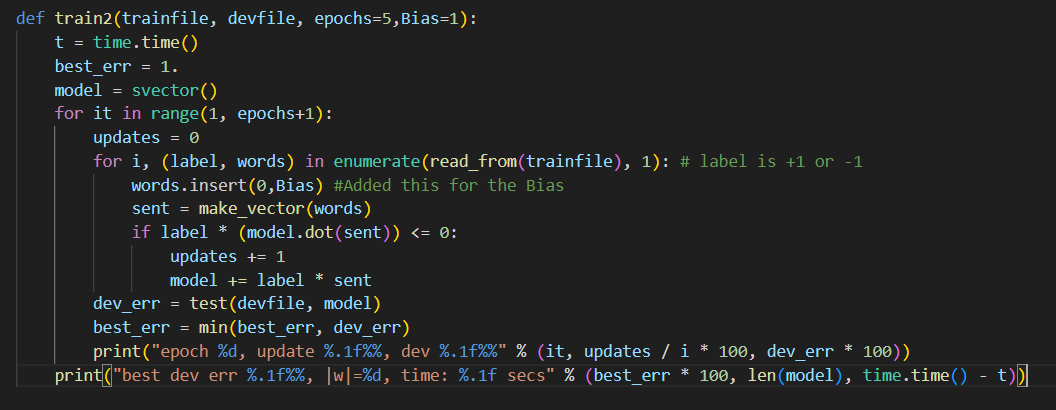

4. 
    <br>
    

In [3]:
model = train2.train2("train.csv","dev.csv",5,Bias = 1) #Train with best model


epoch 1, update 39.0%, dev 37.4%
epoch 2, update 25.5%, dev 31.6%
epoch 3, update 20.8%, dev 33.8%
epoch 4, update 17.2%, dev 35.3%
epoch 5, update 14.1%, dev 28.2%
best dev err 28.2%, |w|=16744, time: 1.7 secs


In [4]:
#Code used to modify csv file for Kaggle
list = train2.test_blind("test.csv",model)
data = pd.read_csv('test.csv')
new_csv = data
target_list = np.array(list)
target_list.reshape(-1,1)
new_csv["target"] = target_list
new_csv.to_csv('test.predicted.csv')

As shown by the screenshot below, my public error rate using Bias = 1 and the model generated from 5 epochs was .302. This ranks me 42nd on the public Kaggle leaderboard.
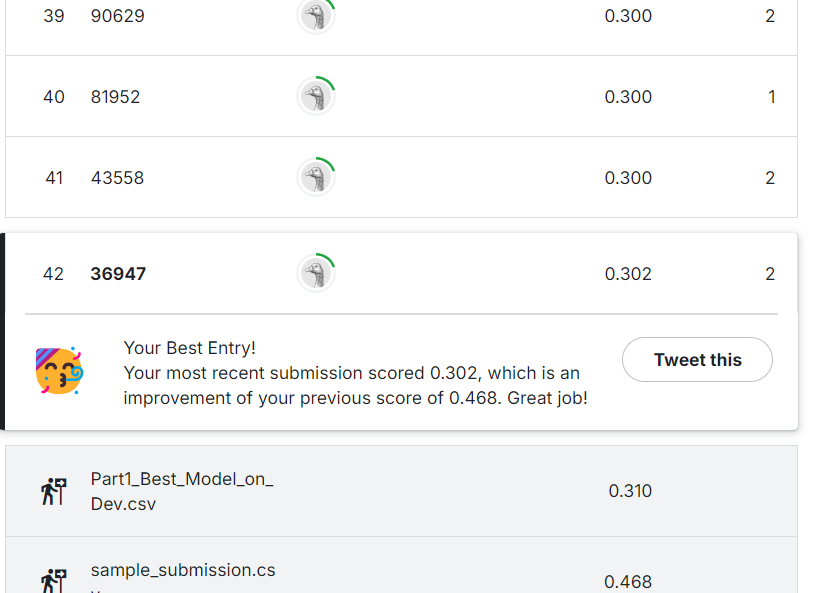

5. 
    <br>
    My best guess for why bias is still needed is because even though the data set is balanced on the basis of positive and negative reviews, the data set is not balanced in relation to the number of positive and negative words. There may be many more positive than negative words used overall, or vice versa, necessitating the use of the bias. 

## Part 2: {-}

1. 

In [5]:
#once again, implement a new file so that I can keep the old one
import train3
importlib.reload(train3)
#This new file will have average perception implemented
model_2 = train3.train3("train.csv","dev.csv",10,Bias = 1)


epoch 1, update 39.0%, dev 31.7%
epoch 2, update 25.5%, dev 28.8%
epoch 3, update 20.8%, dev 27.3%
epoch 4, update 17.2%, dev 27.0%
epoch 5, update 14.1%, dev 26.9%
epoch 6, update 12.2%, dev 26.8%
epoch 7, update 10.5%, dev 26.9%
epoch 8, update 9.7%, dev 26.6%
epoch 9, update 7.8%, dev 26.4%
epoch 10, update 6.9%, dev 25.9%
best dev err 25.9%, |w|=15806, time: 14.5 secs


As shown in the code output above, averaging significantly improved the best dev error rate from 28.2% to 25.9%. This also made the dev error rates more stable, as the dev error rate slowly decreased then slightly moved up and down rather than jumping up and down as in the previous implementation. 

2.
    <br>
    The smart averaging significantly slowed down training, from 3.5 seconds to about 14.5 seconds. 

In [6]:
import collections
import json
test = model_2.items()
#sorted = collections.OrderedDict(sorted(test, key=lambda x: x[1]))
#sorted = collections.OrderedDict(test)
x = 0
word_list = []
score_list = []

keys = [*model_2]  # or keys = list(ordered_dict.keys())
# Unpack values
values = [*model_2.values()]
# Unpack key-value pairs as tuples
for key, value in model_2.items():
    #print(key, value)
    score_list.append(value)
    word_list.append(key)
keys = np.array(word_list)
values = np.array(score_list)
inds = values.argsort()
sorted_list1 = keys[inds]

print("Top 20 most positive features:")
print(sorted_list1[-20:])
print("\n\nTop 20 most negative features:")
print(sorted_list1[0:20])



Top 20 most positive features:
['flaws' 'smarter' 'imax' 'delightful' 'powerful' 'open' 'refreshingly'
 'wonderful' 'dots' 'cinema' 'culture' 'pulls' 'treat' 'skin' 'french'
 'provides' 'rare' 'unexpected' 'triumph' 'engrossing']


Top 20 most negative features:
['boring' 'generic' 'dull' 'badly' 'routine' 'fails' 'ill' 'too' 'instead'
 'tv' 'attempts' 'unless' 'incoherent' 'neither' 'flat' 'seagal' 'problem'
 'scattered' 'worst' 'suffers']


As shown in the code output above, most of the most positive and most negative features make sense. Of course "delightful", "powerful", etc. make sense for postives and "boring"/"generic",etc. make sense for nagative features. The feature that stands out in positives is the word "flaws", but this makes sense in the context of people saying things like "despite its flaws". Some funny results are the words "French" for positive and especially "seagal" for negative. I didn't know that people hated Steven Seagal so much.

4. 

In [7]:
#I made a function to find the strong believed
importlib.reload(train3)
i_list_neg,wrong_list_neg,i_list_pos,wrong_list_pos = train3.P4_sort("dev.csv",model_2)
sorted_list2 = [x for _, x in sorted(zip(i_list_neg, wrong_list_neg))]

print("Top 5 negative reviews most strongly belived to be positive:")
for n in range(5):
    print("\n")
    for i in sorted_list2[-(n+1)]:
        print(i, end=" ")

sorted_list3 = [x for _, x in sorted(zip(i_list_pos, wrong_list_pos))]
print("\n\n\n\nTop 5 postive reviews most strongly belived to be negative:")
for n in range(5):
    print("\n")
    for i in sorted_list3[n]:
        print(i, end=" ")
#print(sorted_list2[0])

Top 5 negative reviews most strongly belived to be positive:


` in this poor remake of such a well loved classic , parker exposes the limitations of his skill and the basic flaws in his vision ' 

how much you are moved by the emotional tumult of fran ois and mich le 's relationship depends a lot on how interesting and likable you find them 

bravo reveals the true intent of her film by carefully selecting interview subjects who will construct a portrait of castro so predominantly charitable it can only be seen as propaganda 

mr wollter and ms seldhal give strong and convincing performances , but neither reaches into the deepest recesses of the character to unearth the quaking essence of passion , grief and fear 

an atonal estrogen opera that demonizes feminism while gifting the most sympathetic male of the piece with a nice vomit bath at his wedding 



Top 5 postive reviews most strongly belived to be negative:


the thing about guys like evans is this you 're never quite sure whe

The code output above shows the five positive and negative reviews in the dev set that the model was most confident in, but that ended up being wrong. The false positive reviews make a lot of sense based on word usage. The reviews use terms like "well loved", "interesting and likable" and "passion". These terms are very positive, but are almost always used in the reviews to describe a lack of something such as passion or likability. The model does not care about word order as far as I know, so the context of the words are lost and only the connotation of the words are used.  

For the false negatives, most reviews actually make sense to be flagged as negative. Most of these reviews list negative qualaties of the movie before stating that the movie was still good despite these negatives. It makes perfect sense to me that this confused the model, as it saw complaints as negative even if in the end people used one or two positive words. honestly, I might have also flagged the fourth and fifth examples as negative reviews if I had no context. 

From these observations, it is clear that the model struggles when unusual words or names are used. The model also struggles with figures of speech. The model does not account for word order, so it misses things like "not likable" and falsely categorizes them as positive. I amagine that deep learning language models do better with categorizing the context of the words being used rather than connotation. 

5. 

In [8]:
list = train2.test_blind("test.csv",model_2)
data = pd.read_csv('test.csv')
new_csv = data
target_list = np.array(list)
target_list.reshape(-1,1)
new_csv["target"] = target_list
new_csv.to_csv('test.predicted.csv')

As shown by the screenshot below, my public error rate using Bias = 1, smart averaging, and the model generated from 10 epochs was .272. This ranks me 30th on the public Kaggle leaderboard.
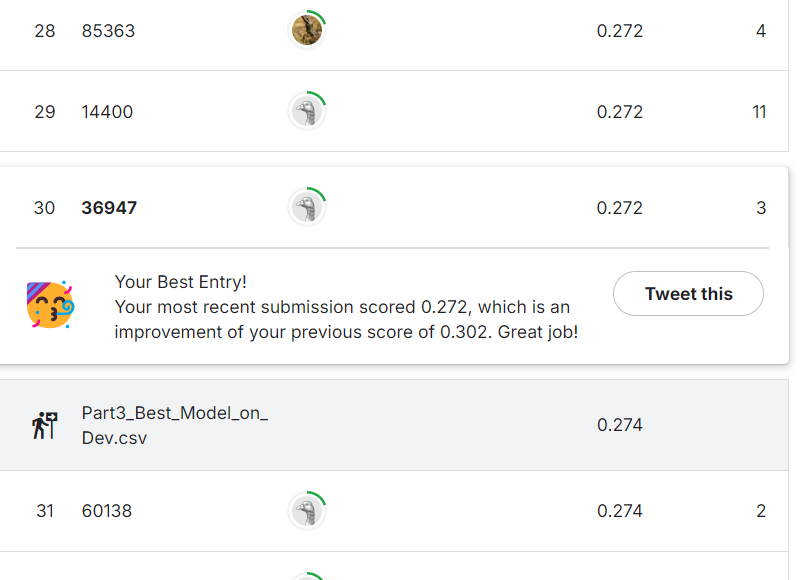

## Part 3: {-}

1. 

In [9]:
#Once again, I am making a new training file to edit. 
import train4
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
importlib.reload(train4)
#Read the training file and make a list of all words
all_words = []
data_file = pd.read_csv('train.csv')
for i, (label, words) in enumerate(train4.read_from("train.csv"), 1):
    all_words.append(words)
#model_3 = train4.train4("train.csv","dev.csv",2,Bias = 1)
x = all_words
length = max(map(len, x))
array=np.array([xi+[np.nan]*(length-len(xi)) for xi in x])
#print(array)
flat_array = [item for sublist in array for item in sublist]
counts = {}

for item in flat_array:
    counts[item] = counts.get(item, 0) + 1

result = [[item for item in sublist if counts[item] > 1] for sublist in array]
new_csv = data_file
length = max(map(len, result))
sentence_list=np.array([xi+[np.nan]*(length-len(xi)) for xi in result])
n=0
for i in sentence_list:
    edited_sentence=" "
    for w in sentence_list[n]:
        if not w=="nan":
            edited_sentence = edited_sentence+" "+w
    new_csv["sentence"][n] = edited_sentence
    n=n+1
#print(new_csv["sentence"][0])
new_csv.to_csv('train_removed.csv',index=False)


In [10]:

importlib.reload(train4)
model_3 = train4.train4("train_removed.csv","dev.csv",13,Bias = 1)

epoch 1, update 39.0%, dev 31.8%
epoch 2, update 26.4%, dev 28.1%
epoch 3, update 22.8%, dev 27.2%
epoch 4, update 18.8%, dev 27.2%
epoch 5, update 17.2%, dev 27.4%
epoch 6, update 14.8%, dev 26.8%
epoch 7, update 13.2%, dev 26.7%
epoch 8, update 12.7%, dev 26.9%
epoch 9, update 11.4%, dev 26.7%
epoch 10, update 10.6%, dev 26.4%
epoch 11, update 10.0%, dev 26.4%
epoch 12, update 9.1%, dev 26.1%
epoch 13, update 8.3%, dev 25.7%
best dev err 25.7%, |w|=8425, time: 12.9 secs


As shown in the code output above, neglecting one count words slightly increased my best dev error rate to 25.7%. 

2. 
    <br>
    My model size shrunk from about 15000 to about 8400, decreasing by almost half. 

3. 
    <br>
    It appears that my update percent slightly increased, which caused the training to need more epochs to converge. This makes sense, as the removing one-count words helps prevent overfitting, so more epochs can be run before overfititng occurs. 

4. 
    <br>
    My training speed noticibly decreased, as it took only 13.5 seconds to run 13 epochs compared to 14 secodons to run 10 epochs without neglecting one-count words.  

In [11]:
#Im lazy so im just gonna copy paste this code :)
all_words = []
data_file = pd.read_csv('train.csv')
for i, (label, words) in enumerate(train4.read_from("train.csv"), 1):
    all_words.append(words)
#model_3 = train4.train4("train.csv","dev.csv",2,Bias = 1)
x = all_words
length = max(map(len, x))
array=np.array([xi+[np.nan]*(length-len(xi)) for xi in x])
#print(array)
flat_array = [item for sublist in array for item in sublist]
counts = {}

for item in flat_array:
    counts[item] = counts.get(item, 0) + 1

result = [[item for item in sublist if counts[item] > 2] for sublist in array]
new_csv = data_file
length = max(map(len, result))
sentence_list=np.array([xi+[np.nan]*(length-len(xi)) for xi in result])
n=0
for i in sentence_list:
    edited_sentence=" "
    for w in sentence_list[n]:
        if not w=="nan":
            edited_sentence = edited_sentence+" "+w
    new_csv["sentence"][n] = edited_sentence
    n=n+1
#print(new_csv["sentence"][0])
new_csv.to_csv('train_removed.csv',index=False)
model_3_1 = train4.train4("train_removed.csv","dev.csv",15,Bias = 1)

epoch 1, update 38.9%, dev 31.5%
epoch 2, update 28.2%, dev 29.0%
epoch 3, update 23.7%, dev 28.2%
epoch 4, update 21.7%, dev 27.7%
epoch 5, update 18.5%, dev 27.7%
epoch 6, update 17.7%, dev 27.2%
epoch 7, update 16.2%, dev 27.1%
epoch 8, update 15.2%, dev 27.2%
epoch 9, update 14.1%, dev 26.9%
epoch 10, update 12.6%, dev 26.8%
epoch 11, update 12.5%, dev 26.9%
epoch 12, update 11.8%, dev 27.2%
epoch 13, update 11.3%, dev 26.6%
epoch 14, update 10.7%, dev 26.7%
epoch 15, update 9.7%, dev 26.7%
best dev err 26.6%, |w|=5934, time: 13.3 secs


As shown in the code output above, my best dev rate after pruning 2-count words was 26.6%, which did not improve the dev error rate. It did decrease the model size and training time, however. 

In [12]:
list = train4.test_blind("test.csv",model_3)
data = pd.read_csv('test.csv')
new_csv = data
target_list = np.array(list)
target_list.reshape(-1,1)
new_csv["target"] = target_list
new_csv.to_csv('test.predicted.csv')

6. 
    <br>
    Using the 13 epoch best dev rate from pruning 1-count words, my new error rate on the Kaggle leaderboard was .276, slightly worse than my best error rate. As shown in the screenshot below, my best error rate did not change so my ranking on the leaderboard was about the same. It has been a day since I last submitted so my ranking went from 30th to 32nd. 

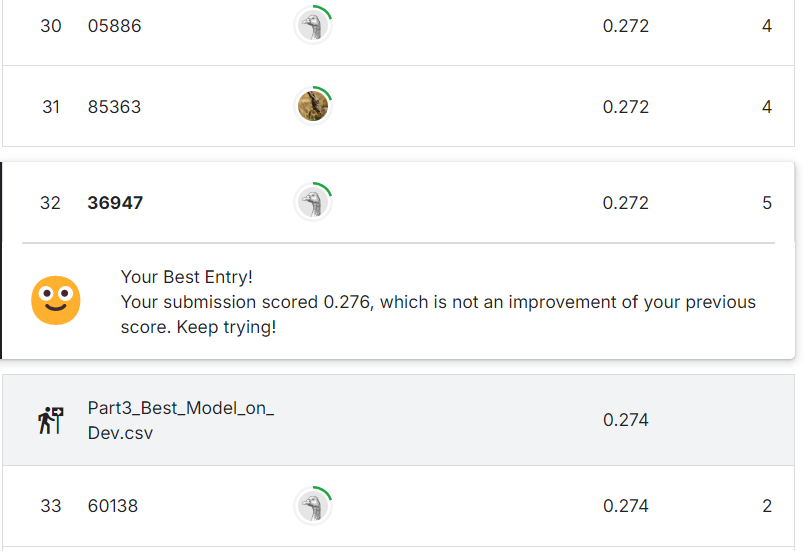
    

## Part 4: {-}

1. 

In [13]:
#Copy pasting my code from part 3 since I already converted an svector to a numpy vector with pruning
all_words = []
data_file = pd.read_csv('train.csv')
for i, (label, words) in enumerate(train4.read_from("train.csv"), 1):
    all_words.append(words)
#model_3 = train4.train4("train.csv","dev.csv",2,Bias = 1)
x = all_words
length = max(map(len, x))
array=np.array([xi+["~"]*(length-len(xi)) for xi in x])
#print(array)
flat_array = [item for sublist in array for item in sublist]
counts = {}

for item in flat_array:
    counts[item] = counts.get(item, 0) + 1
#Prune words to run faster
result = [[item for item in sublist if counts[item] > 1] for sublist in array]
length = max(map(len, result))
sentence_array=np.array([xi+["~"]*(length-len(xi)) for xi in result])
#print(sentence_array.shape)
#Conver to a list
sentence_list = []
word_list = []
i = 0
for sentence in enumerate(sentence_array):
    for j,word in enumerate(sentence_array[i]):
        if not word == "~":
            word_list.append(word)
    sentence_list.append(word_list)
    word_list = []
    i = i+1

#Get target as array
target = []
for data in data_file["target"]:
    if data == "+":
        target.append(1)
    else:
        target.append(0)
vector_train= np.array(target)

#trying MLPClassifier
from sklearn.neural_network import MLPClassifier
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from nltk.tokenize import word_tokenize

labeled_data=[]
#Set up tagged document
for i,sentence in enumerate(sentence_list):
    labeled_data.append(TaggedDocument(words=sentence_list[i],tags=[target[i]]))
    

model = Doc2Vec(epochs=20,vector_size=300,dm=0,window = 18)
model.build_vocab(labeled_data)
model.train(labeled_data, total_examples=model.corpus_count, epochs=model.epochs)

#Now generate vecotrs
document_vectors = []
for sentence in sentence_list:
    document_vectors.append(model.infer_vector(sentence))

#Creating new code block to train data
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


Y = vector_train

clf = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(100,))
#clf = svm.SVC(kernel='poly', C = 1)
#clf = GaussianNB()
clf.fit(document_vectors, Y)



#Need to get X_Test data so again need to convert
all_words = []
data_file = pd.read_csv('dev.csv')
for i, (label, words) in enumerate(train4.read_from("dev.csv"), 1):
    all_words.append(words)
#model_3 = train4.train4("train.csv","dev.csv",2,Bias = 1)
x = all_words
length = max(map(len, x))
array=np.array([xi+["~"]*(length-len(xi)) for xi in x])
#print(array)
flat_array = [item for sublist in array for item in sublist]
counts = {}

for item in flat_array:
    counts[item] = counts.get(item, 0) + 1
#Prune words to run faster
result = [[item for item in sublist if counts[item] > 0] for sublist in array]
length = max(map(len, result))
sentence_array=np.array([xi+["~"]*(length-len(xi)) for xi in result])

#Conver to a list
sentence_list_test = []
word_list = []
i = 0
for sentence in enumerate(sentence_array):
    for j,word in enumerate(sentence_array[i]):
        if not word == "~":
            word_list.append(word)
    sentence_list_test.append(word_list)
    word_list = []
    i = i+1
document_vectors_test = []
for sentence in sentence_list_test:
    document_vectors_test.append(model.infer_vector(sentence))

y_pred = clf.predict(document_vectors_test)

#Get target as array
target_test = []
for data in data_file["target"]:
    if data == "+":
        target_test.append(1)
    else:
        target_test.append(0)
vector_train_test= np.array(target_test)

# Evaluate the model
accuracy = accuracy_score(vector_train_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.754


In [14]:
#Need to get X_Test data so again need to convert
all_words = []
data_file = pd.read_csv('test.csv')
for i, (label, words) in enumerate(train4.read_from("test.csv"), 1):
    all_words.append(words)
#model_3 = train4.train4("train.csv","dev.csv",2,Bias = 1)
x = all_words
length = max(map(len, x))
array=np.array([xi+["~"]*(length-len(xi)) for xi in x])
#print(array)
flat_array = [item for sublist in array for item in sublist]
counts = {}

for item in flat_array:
    counts[item] = counts.get(item, 0) + 1
#Prune words to run faster
result = [[item for item in sublist if counts[item] > 0] for sublist in array]
length = max(map(len, result))
sentence_array=np.array([xi+["~"]*(length-len(xi)) for xi in result])

#Conver to a list
sentence_list_test = []
word_list = []
i = 0
for sentence in enumerate(sentence_array):
    for j,word in enumerate(sentence_array[i]):
        if not word == "~":
            word_list.append(word)
    sentence_list_test.append(word_list)
    word_list = []
    i = i+1
document_vectors_test = []
for sentence in sentence_list_test:
    document_vectors_test.append(model.infer_vector(sentence))

y_pred = clf.predict(document_vectors_test)

set = []
for data_2 in y_pred:
    if data_2 == 1:
        set.append("+")
    else:
        set.append("-")
list = np.array(set)
data = pd.read_csv('test.csv')
new_csv = data
target_list = np.array(list)
target_list.reshape(-1,1)
new_csv["target"] = target_list
new_csv.to_csv('test.predicted.csv')

1. 
    <br>
    I tired using "Doc2Vect" to turn the list of sentences of each review into a vector field. When researching this method, I read that using this method is supposed to help capture some of the conetext of the review based on the words within a certain distance from the current word. I did not have to change my code much to use this-I just had to convert my numpy array used for pruning back into a list of lists. Then, I used "MLP Classifier" from sklearn to fit the data to a model and predict the test data based on the vectors generated by Doct2Vec.

2. 
    <br>
    As shown in the code output above, my dev error rate was 24.6%. My running time was about 19 seconds, slightly slower than the averaged perception. 

3. 
    <br>
    The screneshot below shows my best prediction for this method. the best public error rate ended up being .276, which unfortunately was higher than my best error rate for averaged perception. This made my publix score and rank stay the same, as shown below. 
    
    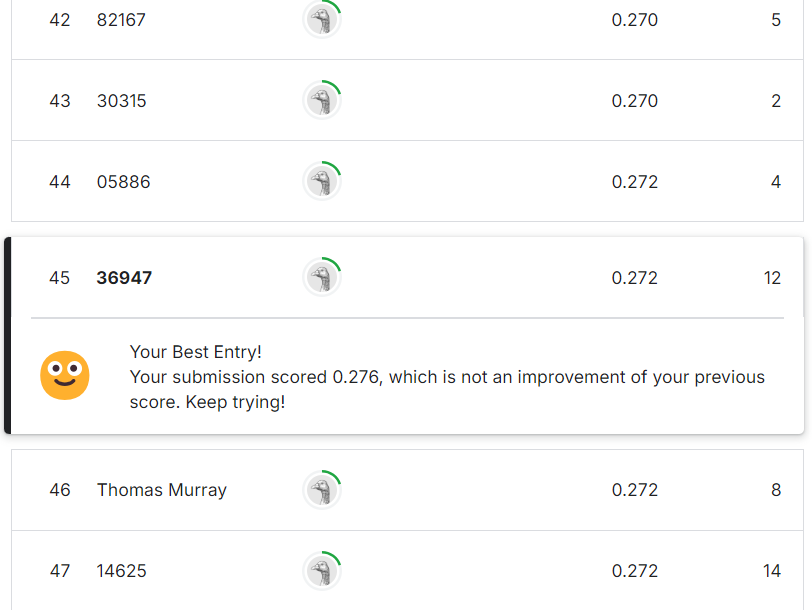

4. 
    <br>
    I was quite suprised that te Doc2Vec method did not yield better results. I actually spent a few hours tuning the inputs but never got a dev result better than my averaged perception. This was dissappointing, as I had read that Doc2Vec can do better at predicting the meaning behind sentences as it considers the relationships between words in a review. I had thought that this was a disadvantage to using averaged perception that would be fixed by using Doc2Vec. I was quite dissapointed to see that this method was actually slightly worse than averaged perception. My best guess for why this occured is because Doc2Vec is designed to handle massive amounts of data (hundreds of thousands of reviews), whereas the dev set was only 8000 reviews. It is also possible that this was just user error as I am unfamiliar in using this approach. Overall, I know that there must be other algorithms that do better, as there are people on the Kaggle leaderboard with error rates much lower than mine. 

## Part 5: {-}

1. 
    <br>
    My best dev error rate was 24.6%, achieved using the Doc2Vec and MLPClassifier method in Part 4. This method did not yield a better score on the public leaderboard, unfortunately.

2. 
    <br>
    My overall best public score ended up being .272 using averaged perception and pruning 1 count words. As of Monday night, this ranks 87th :(.

## Part 6: {-}

1. 
    <br>
    I spend about 15 hours on this assignment. 

2. 
    <br>
    I would rat this assignment as moderate.

3. 
    <br>
    I worked ont he assignment mostly alone. 

4. 
    <br>
    I feel like I mostly understood the perception material. 

5. 
    <br>
    N/A